**What is a Portfolio?**
* A portfolio in finance refers to a collection of financial assets.

* In simpler terms a portfolio is like a basket where you put different types of investments.The goal is to diversify , so if one investment performs poorly, others might perform well and reduce your overall risk.

**Portfolio Asset Management**

* Portfolio Asset Management is the process of constructing, monitoring, and managing a group of investments (the portfolio) to achieve specific financial goals. It balances risk and return by strategically allocating assets.

**Problem statement**
* This project focuses on the construction and optimization of a diversified portfolio composed of four major technology stocks — Google (GOOG), Apple (AAPL), Meta (META), Amazon (AMZN) ,  alongside the S&P 500 index, all traded on the New York Stock Exchange. The primary objective is to apply portfolio management techniques to minimize the overall risk while maintaining or enhancing the expected return of the investment.

________________________________________________________________________________

**Pipeline**

1) Data Acquisition  
2) Exploratory Data Analysis (EDA)  
3) Compute Daily Returns  

4) Portfolio Optimization  
   ├── Volatility  
   ├── Sharpe Ratio  
   └── Sortino Ratio  

5) Risk Analysis  
   ├── Value at Risk (VaR)  
   └── Beta Calculation  

6) Portfolio Simulation (Monte Carlo Simulation)  

________________________________________________________________________________

#Data Acquisition

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
GOOG = yf.download("GOOG", start="2023-01-01", end="2024-01-01",group_by="ticker") # Stock of Google
AAPL = yf.download("AAPL", start="2023-01-01", end="2024-01-01",group_by="ticker") # Stock of Apple
META = yf.download("META", start="2023-01-01", end="2024-01-01",group_by="ticker") # Stock of Facebook
AMZN = yf.download("AMZN", start="2023-01-01", end="2024-01-01",group_by="ticker") # Stock of Amazon

/tmp/ipython-input-58-1333519112.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  GOOG = yf.download("GOOG", start="2023-01-01", end="2024-01-01",group_by="ticker") # Stock of Google
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-58-1333519112.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  AAPL = yf.download("AAPL", start="2023-01-01", end="2024-01-01",group_by="ticker") # Stock of Apple
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-58-1333519112.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  META = yf.download("META", start="2023-01-01", end="2024-01-01",group_by="ticker") # Stock of Facebook
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-58-1333519112.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  AMZN = yf.dow

In [ ]:
# Stock of S&P 500
"""It’s a benchmark index used to measure the overall performance of the U.S. stock market"""

sp500 = yf.download("^GSPC", start="2023-01-01", end="2024-01-01",group_by="ticker")

/tmp/ipython-input-59-3551020387.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start="2023-01-01", end="2024-01-01",group_by="ticker")
[*********************100%***********************]  1 of 1 completed


In [ ]:
sp500.head()

Ticker            ^GSPC                                                   
Price              Open         High          Low        Close      Volume
Date                                                                      
2023-01-03  3853.290039  3878.459961  3794.330078  3824.139893  3959140000
2023-01-04  3840.360107  3873.159912  3815.770020  3852.969971  4414080000
2023-01-05  3839.739990  3839.739990  3802.419922  3808.100098  3893450000
2023-01-06  3823.370117  3906.189941  3809.560059  3895.080078  3923560000
2023-01-09  3910.820068  3950.570068  3890.419922  3892.090088  4311770000

#Exploratory Data Anaysis

In [ ]:
data = [GOOG, AAPL, META, AMZN]
names = ['GOOG', 'AAPL', 'META', 'AMZN']

In [ ]:
for i, df in zip(names , data):
    print(f"names {i} - Null values:\n{df.isnull().sum()}")

names GOOG - Null values:
Ticker  Price 
GOOG    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
Close             0
dtype: int64
names AAPL - Null values:
Ticker  Price 
AAPL    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
Close             0
dtype: int64
names META - Null values:
Ticker  Price 
META    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
Close             0
dtype: int64
names AMZN - Null values:
Ticker  Price 
AMZN    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
Close             0
dtype: int64


In [ ]:
GOOG['Close'] = GOOG['GOOG',  'Close']
AAPL['Close'] = AAPL['AAPL',  'Close']
META['Close'] = META['META',  'Close']
AMZN['Close'] = AMZN['AMZN',  'Close']
sp500['Close'] = sp500['^GSPC',  'Close']


In [ ]:
#Combining dataframes
dataset = pd.concat([GOOG['Close'], AAPL['Close'], META['Close'], AMZN['Close'], sp500["Close"]],axis=1)
# Change the column names
dataset.columns =['GOOG', 'AAPL', 'META','AMZN', "sp500"]
dataset.head()

,GOOG,AAPL,META,AMZN,sp500
Date,,,,,
2023-01-03,89.169952,123.470627,124.059402,85.820000,3824.139893
2023-01-04,88.185814,124.744133,126.675056,85.139999,3852.969971
2023-01-05,86.257271,123.421257,126.247398,83.120003,3808.100098
2023-01-06,87.639053,127.962418,129.310608,86.080002,3895.080078
2023-01-09,88.275269,128.485641,128.763611,87.360001,3892.090088


In [ ]:
print('Shape of data',dataset.shape)

Shape of data (250, 5)


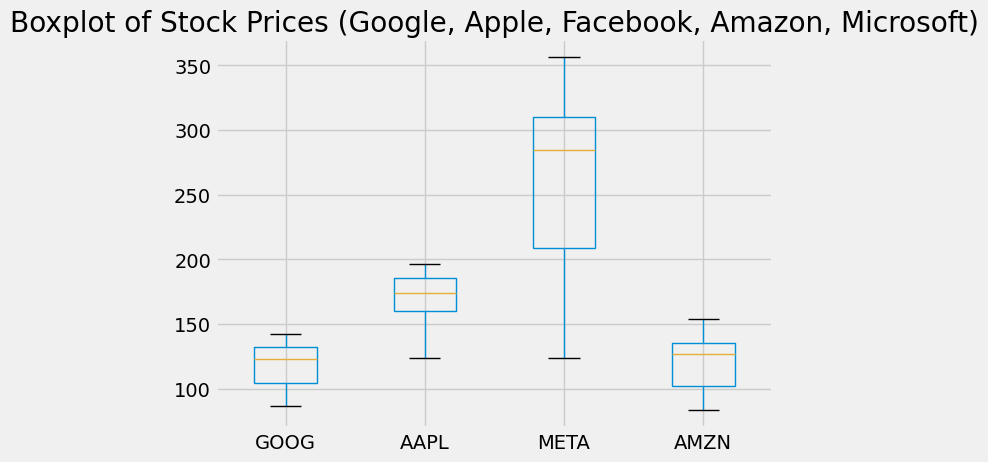

In [ ]:
plt.style.use("fivethirtyeight")
dataset[['GOOG','AAPL','META','AMZN']].boxplot()
plt.title("Boxplot of Stock Prices (Google, Apple, Facebook, Amazon, Microsoft)")
plt.show()

**Explanation**

* META has the highest stock price variability and median value.

* AAPL has a tight range and high median.

* GOOG and AMZN show lower prices and less variation compared to META.

________________________________________________________________________________

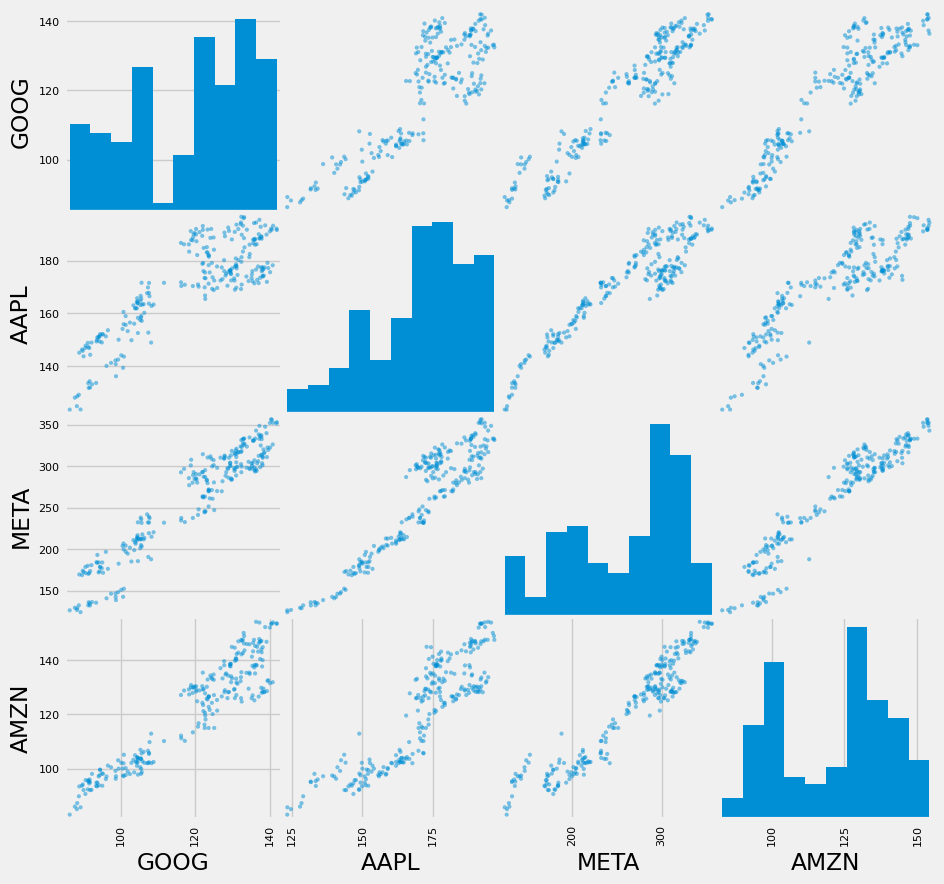

In [ ]:
pd.plotting.scatter_matrix(dataset[['GOOG','AAPL','META','AMZN']], figsize=(10,10))
plt.show()

**Explanation**

* AAPL has a relatively narrow distribution, indicating lower volatility.

* META shows a wider range, suggesting more volatility or significant growth.

* GOOG and AMZN also have varied distributions, with AMZN slightly skewed.

________________________________________________________________________________

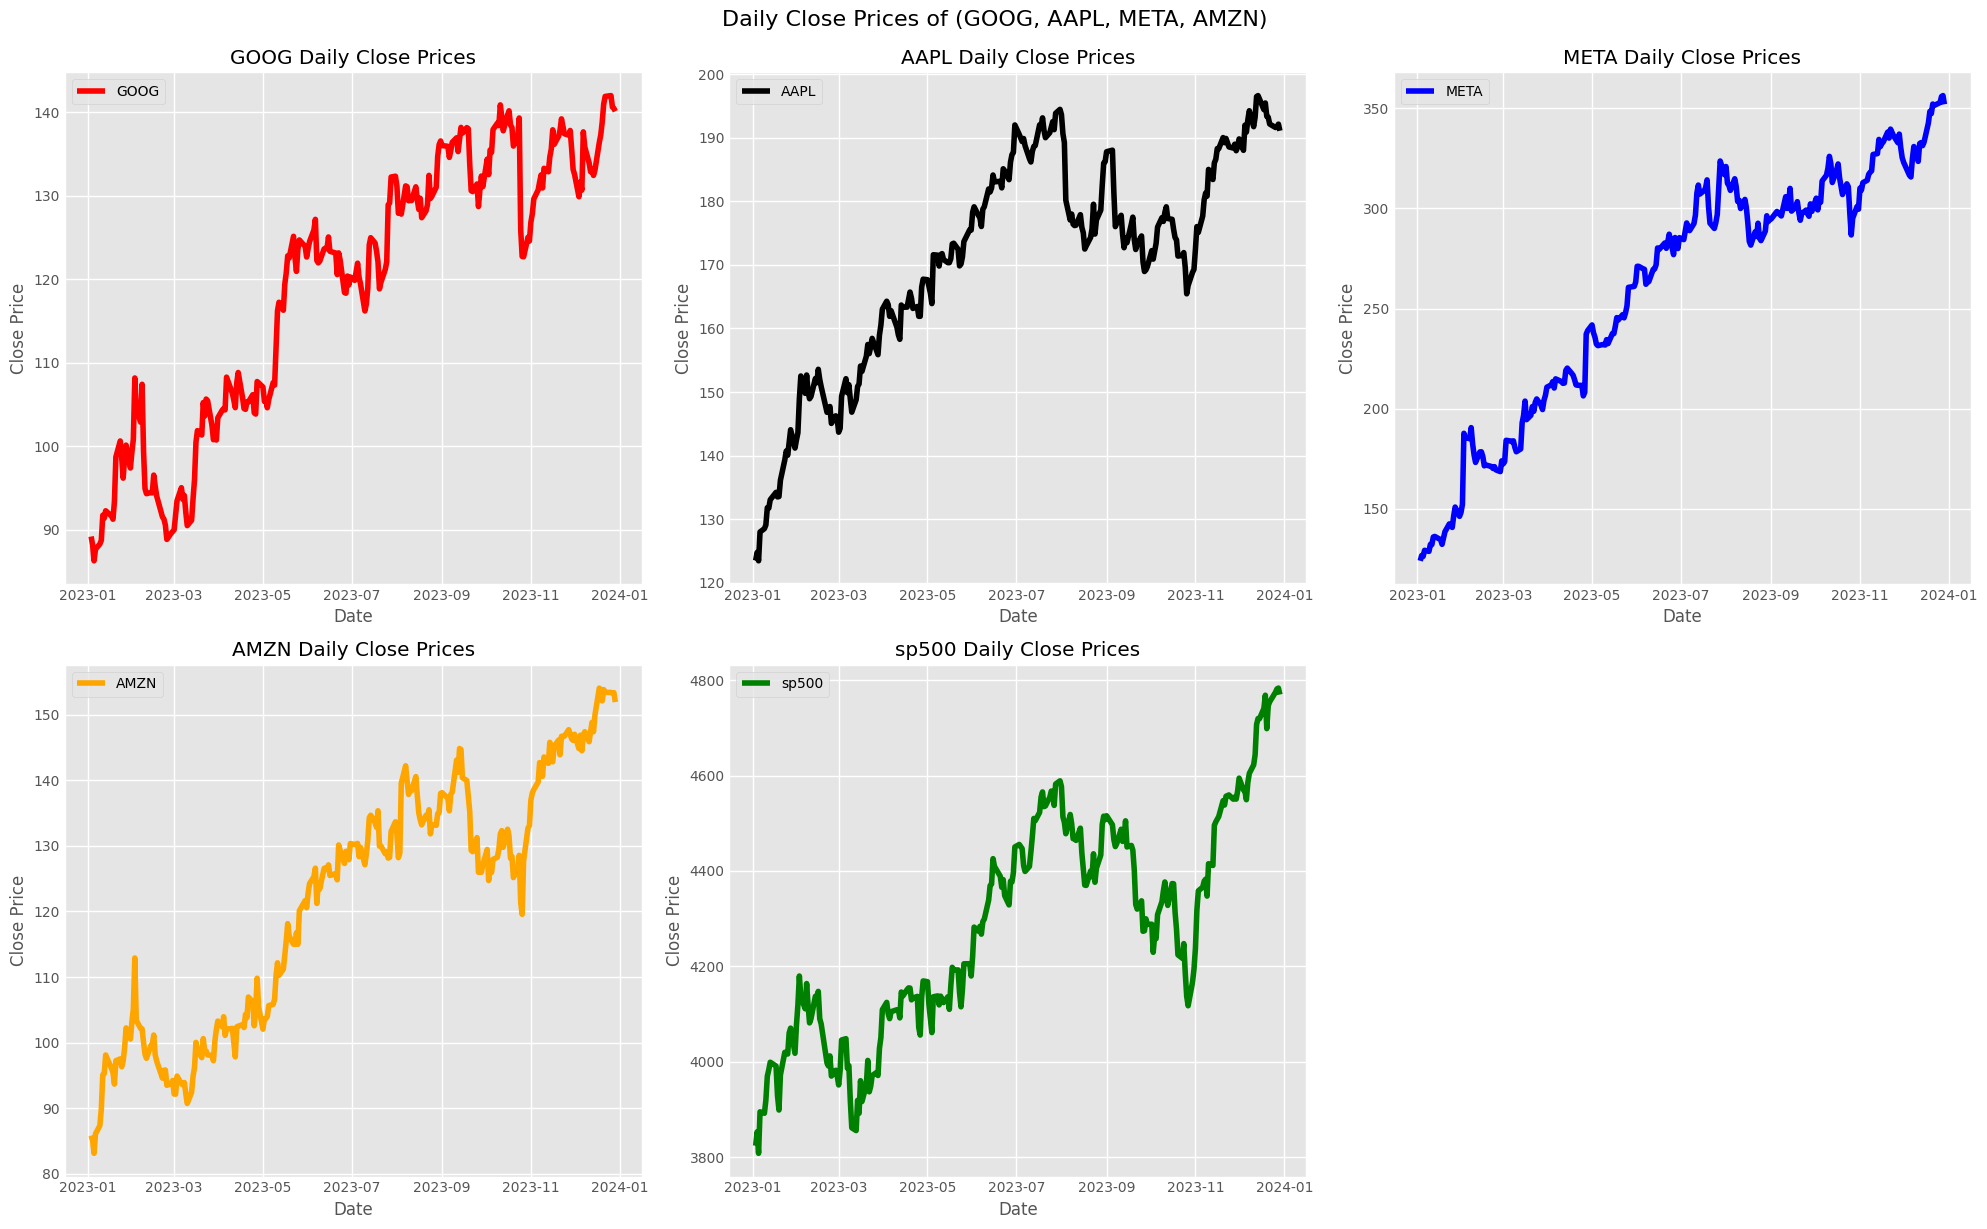

In [ ]:
#plot Daily close price of each stock

plt.figure(figsize=(20, 12))

companies = ['GOOG', 'AAPL', 'META', 'AMZN',"sp500"]
colors = ['red', 'black', 'blue', 'orange',"green"]

for i, (company, color) in enumerate(zip(companies, colors), start=1):
    plt.subplot(2, 3, i)
    plt.plot(dataset[company], color=color, label=company)
    plt.title(f"{company} Daily Close Prices")
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.suptitle('Daily Close Prices of (GOOG, AAPL, META, AMZN)', fontsize=16, y=1.02)
plt.show()


**Explanation**

* All four tech stocks show positive performance.

* META had the most aggressive growth.

* AAPL was the most stable and consistent.
________________________________________________________________________________

# Daily Returns




In [ ]:
#Create a new columns Return in the dataset for each company's

stocks = ['GOOG', 'AAPL', 'META', 'AMZN', 'sp500']

# Loop to calculate return for each stock
for stock in stocks:
    dataset[f'R_{stock}'] = dataset[stock].pct_change(1)
dataset.head()

,GOOG,AAPL,META,AMZN,sp500,R_GOOG,R_AAPL,R_META,R_AMZN,R_sp500
Date,,,,,,,,,,
2023-01-03,89.169952,123.470627,124.059402,85.820000,3824.139893,NaN,NaN,NaN,NaN,NaN
2023-01-04,88.185814,124.744133,126.675056,85.139999,3852.969971,-0.011037,0.010314,0.021084,-0.007924,0.007539
2023-01-05,86.257271,123.421257,126.247398,83.120003,3808.100098,-0.021869,-0.010605,-0.003376,-0.023726,-0.011646
2023-01-06,87.639053,127.962418,129.310608,86.080002,3895.080078,0.016019,0.036794,0.024264,0.035611,0.022841
2023-01-09,88.275269,128.485641,128.763611,87.360001,3892.090088,0.007259,0.004089,-0.004230,0.014870,-0.000768


#Portfolio Optimization

* The goal of **portfolio optimization** is to find portfolios that offer the highest possible expected return for a given level of risk, or the lowest possible risk for a given expected return.

* The **Efficient Frontier** is the curved line of points at the top-left boundary of the scatter plot. These portfolios are considered "efficient" because they offer the best possible risk-return trade-off.

* Any portfolio below the efficient frontier is suboptimal because a portfolio on the frontier exists with either a higher return for the same risk, or lower risk for the same return.

* Any portfolio to the right of the efficient frontier is also suboptimal as it has higher risk for the same return.
________________________________________________________________________________

##Volatility

In [ ]:
# Daily volatility (in %) of each stock
dataset[['R_GOOG','R_AAPL','R_META','R_AMZN', 'R_sp500']].std()

,0
R_GOOG,0.019283
R_AAPL,0.012570
R_META,0.025090
R_AMZN,0.020805
R_sp500,0.008258


In [ ]:
volatility_percentage = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN', 'R_sp500']].std() * 100

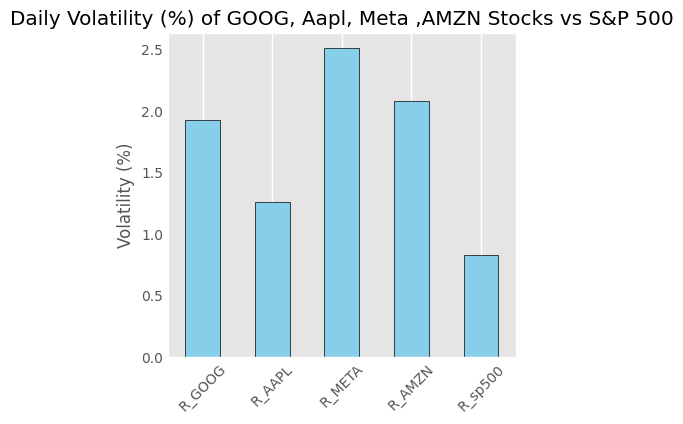

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
volatility_percentage.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Daily Volatility (%) of GOOG, Aapl, Meta ,AMZN Stocks vs S&P 500')
plt.ylabel('Volatility (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

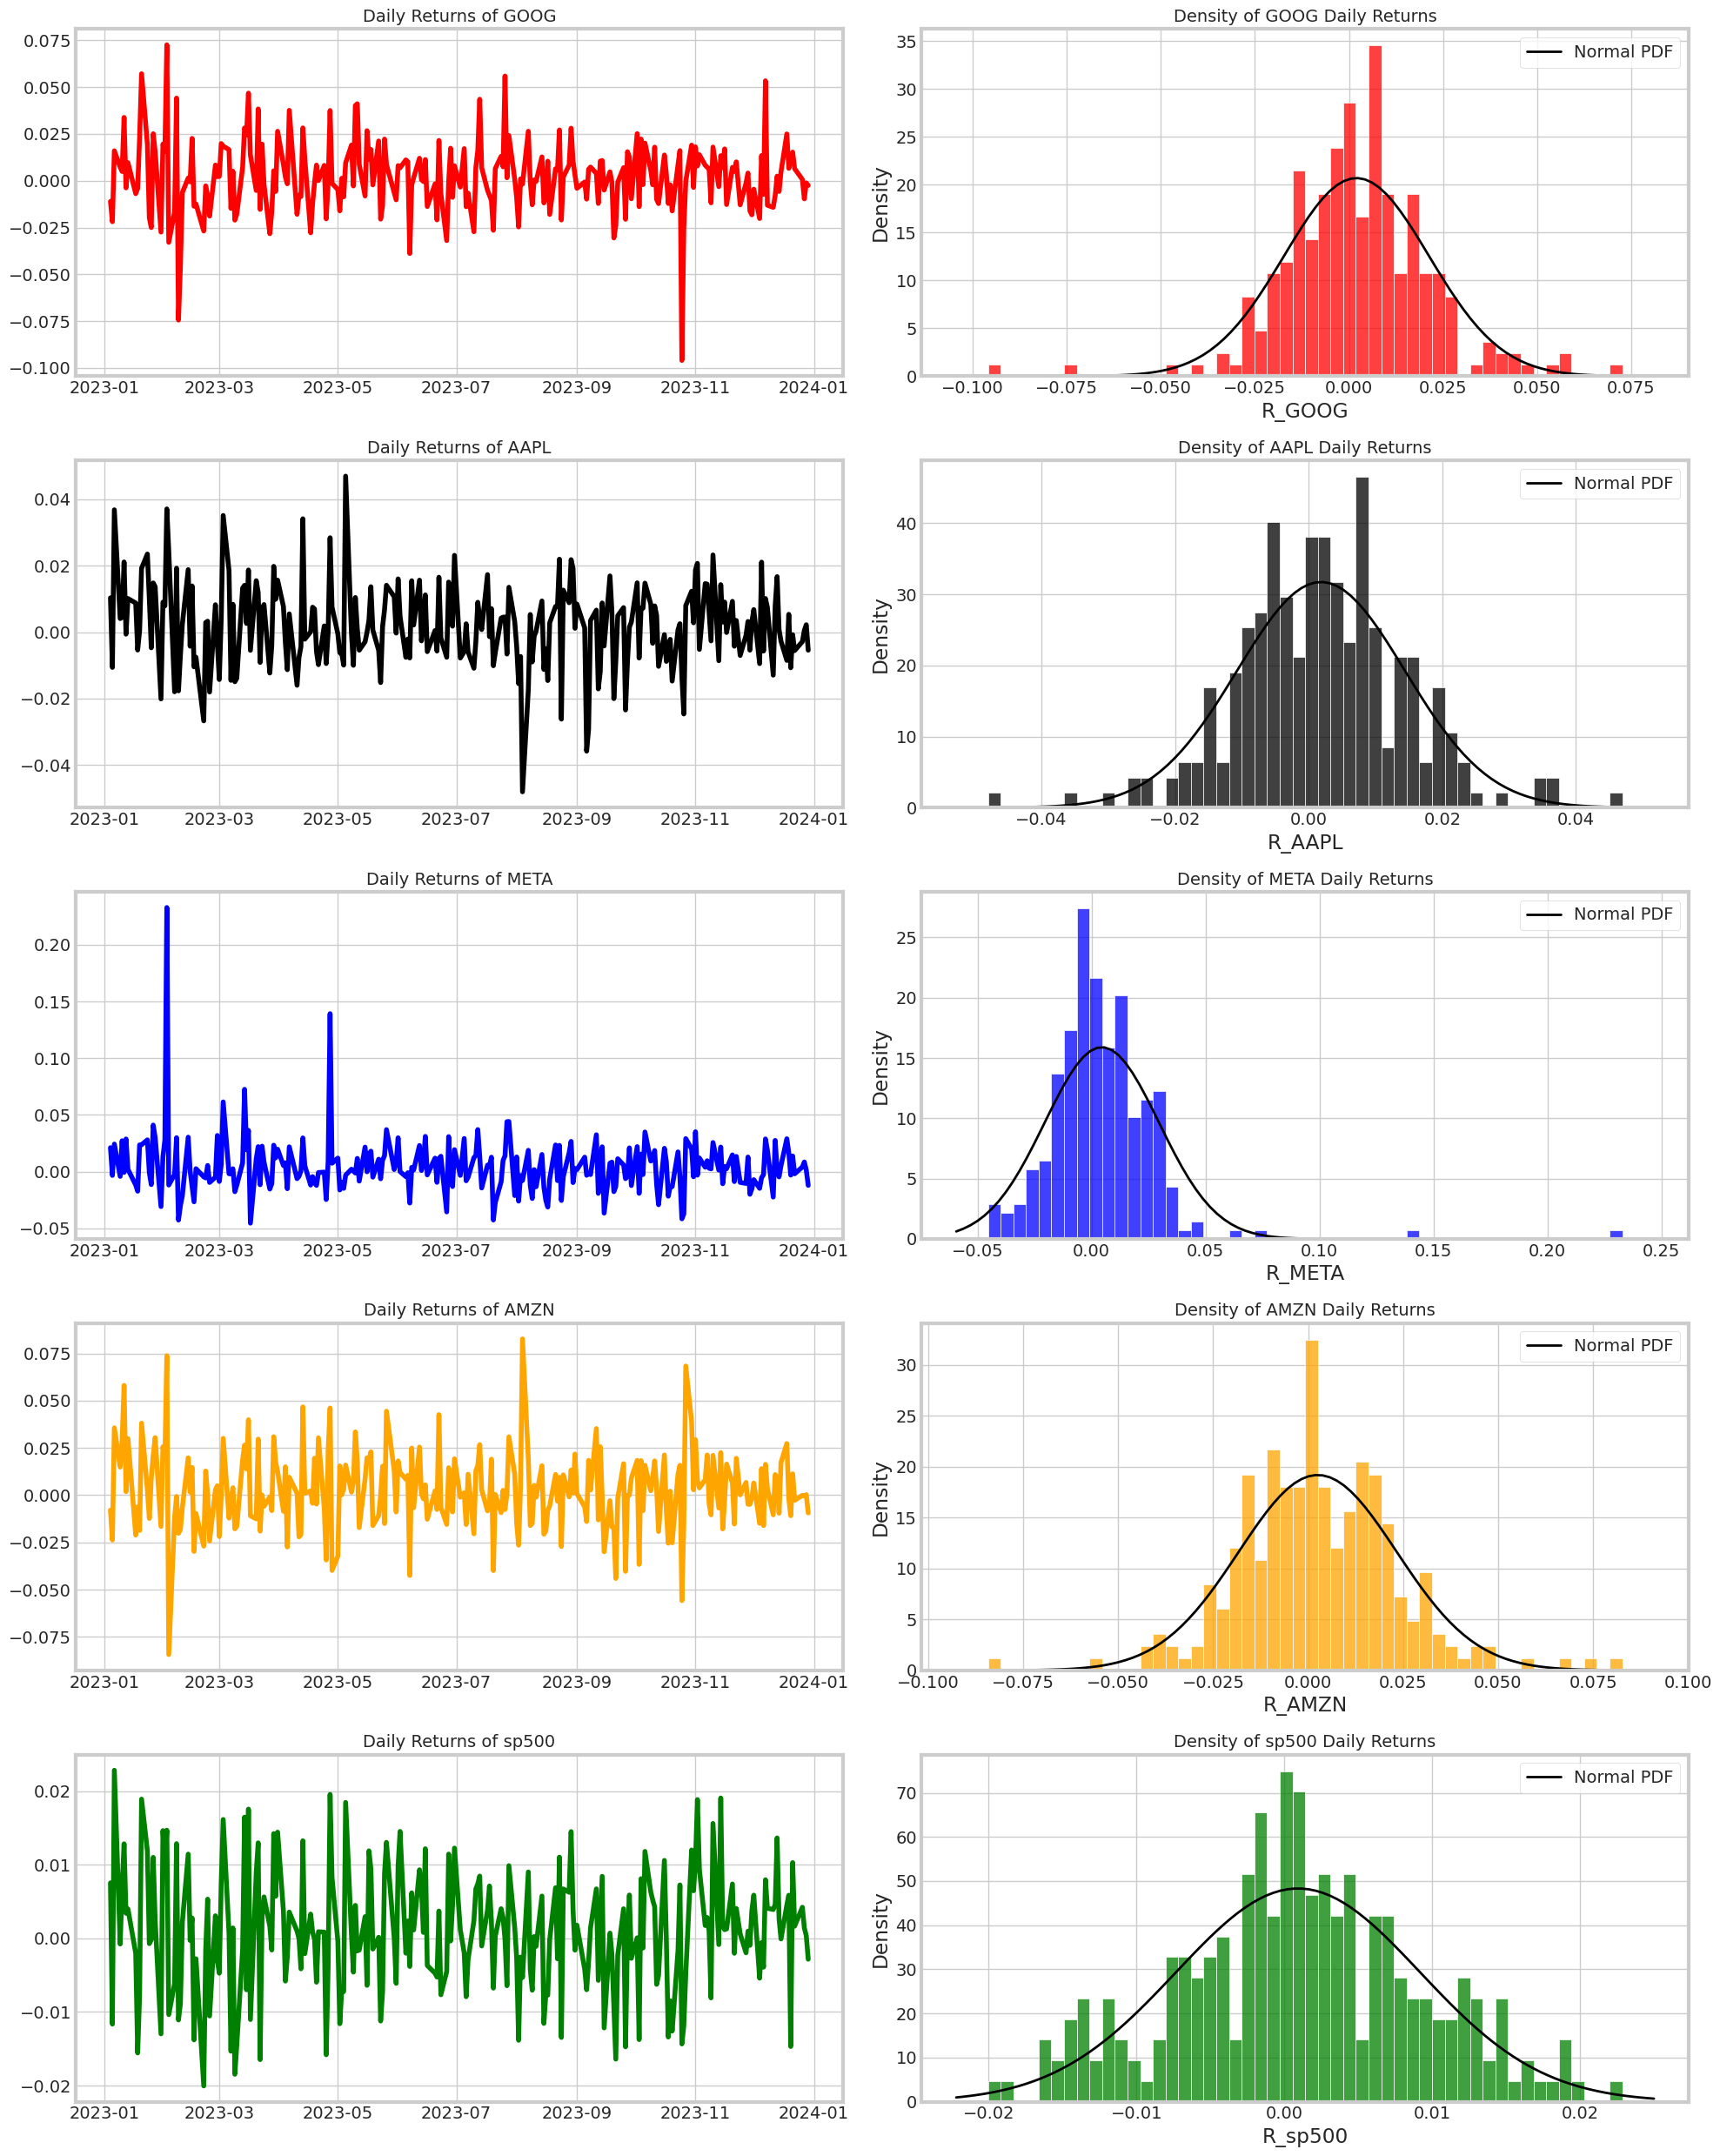

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

stocks = {
    'GOOG': 'red',
    'AAPL': 'black',
    'META': 'blue',
    'AMZN': 'orange',
    'sp500': 'green'
}

with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))  # 5 rows for 5 stocks

    for idx, (stock, color) in enumerate(stocks.items()):
        # Line plot: Daily Returns
        axes[idx][0].plot(dataset[f'R_{stock}'], color=color)
        axes[idx][0].set_title(f'Daily Returns of {stock}', fontsize=14)

        # Distribution plot: Return Density
        sns.histplot(dataset[f'R_{stock}'], stat="density", bins=50, kde=False, color=color, ax=axes[idx][1])
        xmin, xmax = axes[idx][1].get_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, dataset[f'R_{stock}'].mean(), dataset[f'R_{stock}'].std())
        axes[idx][1].plot(x, p, 'k', linewidth=2, label='Normal PDF')
        axes[idx][1].set_title(f'Density of {stock} Daily Returns', fontsize=14)
        axes[idx][1].legend()

    plt.tight_layout()
    plt.show()


**Key Takeaways**

* Center: All assets’ average daily return is near zero.

* Spread: META is the most volatile (widest density), AAPL the least.

* Tails: Fat tails across all plots signal occasional extreme returns—important for risk management.

* Skew: Right skew in individual stocks suggests a bias toward occasional larger positive moves versus negative ones.
________________________________________________________________________________

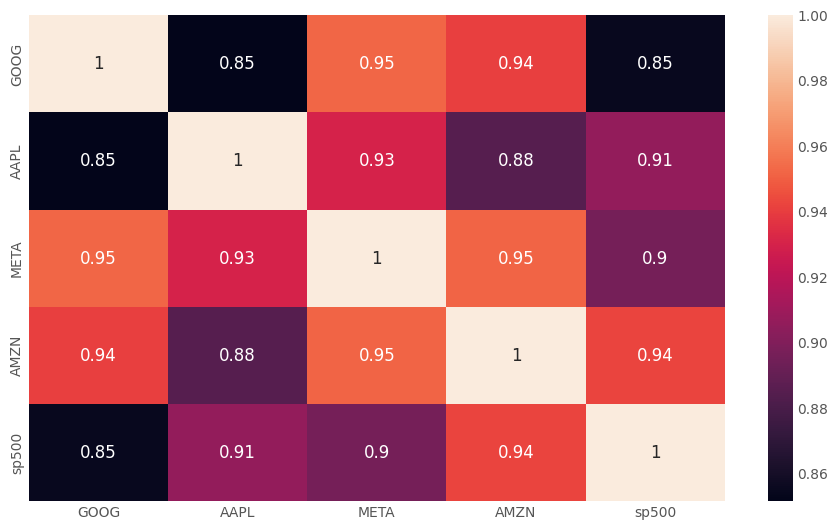

In [ ]:
#plot correlation between stocks
corr = dataset[['GOOG','AAPL','META','AMZN',"sp500"]].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks()
plt.yticks()
plt. show()

**Findings**

* All tech stocks and the S&P 500 move in lockstep (correlations ≥ 0.85).

* META and AMZN are the most tightly coupled (0.95).

* High correlations imply limited diversification benefit within this group—when the market moves, they tend to move together.
________________________________________________________________________________

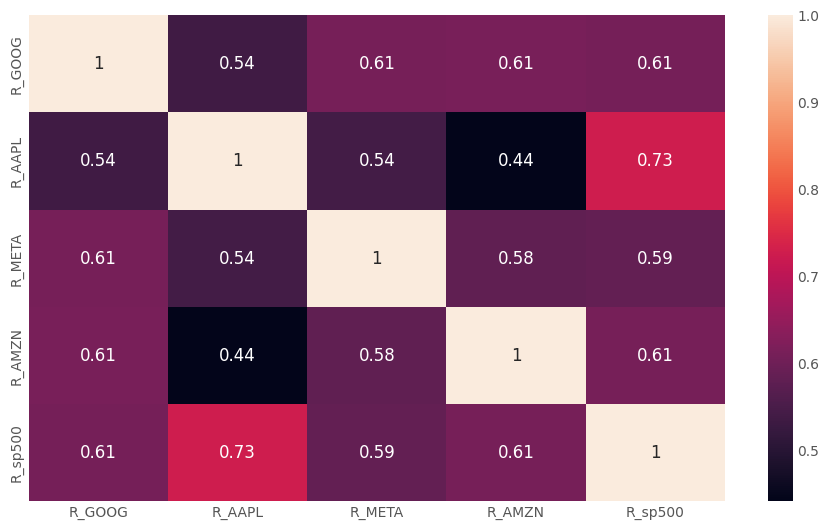

In [ ]:
#plot correlation beween return of each stock
corr = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN',"R_sp500"]].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks()
plt.yticks()
plt. show()

**Findings**

* Apple (0.73) has the strongest link to the S&P 500, while Meta (0.59) has the weakest among the four.

* Inter-stock correlations range from 0.44 (AAPL–AMZN) to 0.61, indicating only moderate co‑movement—and thus some diversification benefit—within this tech group.

* All four stocks move more closely with the market (0.59–0.73) than with each other, so adding non‑tech or uncorrelated assets would further reduce portfolio risk.

________________________________________________________________________________

In [ ]:
#Check annual volatility of returns

returns  = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN',"R_sp500"]]
#Since there are 252 trading days in a year
n_days = 252
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per year')

The volatility of the stock of R_GOOG = 30.61 % per year
The volatility of the stock of R_AAPL = 19.95 % per year
The volatility of the stock of R_META = 39.83 % per year
The volatility of the stock of R_AMZN = 33.03 % per year
The volatility of the stock of R_sp500 = 13.11 % per year


In [ ]:
#Check monthly volatility of returns
returns  = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN',"R_sp500"]]
#Since there are 21 trading days in a month
n_days = 21
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per month')

The volatility of the stock of R_GOOG = 8.84 % per month
The volatility of the stock of R_AAPL = 5.76 % per month
The volatility of the stock of R_META = 11.5 % per month
The volatility of the stock of R_AMZN = 9.53 % per month
The volatility of the stock of R_sp500 = 3.78 % per month


* sp500 has least volatility both daily and annual ,while META with 39.83 % per year and 11.5 % per month,  has the most, meaning higher price fluctuations and pottential risk
________________________________________________________________________________

##**Sharpe ratio**

* The Sharpe Ratio is a measure used to evaluate the risk-adjusted return of an investment or portfolio. It tells you how much excess return you are getting per unit of risk.

* It helps compare which stock is offering the best risk-adjusted performance.

                     Sharpe ratio = (Rp−Rf) / σp

where

* Rp is Expected portfolio return

* Rf is Risk-free rate (e.g., return from government bonds)

* σp is Standard deviation of the portfolio (i.e., risk) *italicised text*

**A higher Sharpe Ratio indicates better risk-adjusted returns, meaning the investor earns more return for each unit of risk taken**
________________________________________________________________________________

In [ ]:
n_days = 252
def sharpe_ratio (serie, rf = 0.025):
    ''''
    serie : Series of daily returns of the stock or portfolio
    rf: annual return on a risk-free investment (default rf=0.025)
    '''''
    # Mean Annualized Return
    rp = serie.mean()*n_days
    # Annual volatility
    volatility = serie.std()*np.sqrt(n_days)
    # Sharpe ratio
    sharpe = (rp -rf  ) / volatility
    return sharpe

In [ ]:
# Let's consider a risk-free investment with an annual return of 2.5% and
#we calculate the Sharpe Ratio of each stock
for col in returns.columns:
    print("The Sharpe ratio of,", col,"=", round(sharpe_ratio(returns[col]),2 ))

The Sharpe ratio of, R_GOOG = 1.57
The Sharpe ratio of, R_AAPL = 2.19
The Sharpe ratio of, R_META = 2.78
The Sharpe ratio of, R_AMZN = 1.84
The Sharpe ratio of, R_sp500 = 1.58


**Explanation**

* R_META has the highest Sharpe ratio (2.78) — indicating the best risk-adjusted performance.

* R_AAPL also performs very well (2.19), suggesting solid returns for the level of risk.

* R_GOOG and R_sp500 have nearly identical ratios (~1.57–1.58), implying similar efficiency in terms of risk-adjusted return.
________________________________________________________________________________


##**Sortino Ratio**

* The Sortino Ratio is an improvement over the Sharpe Ratio. It focusses on Downside volatility only, which is what investors truly care about

* The Sortino Ratio tells us how much excess return you're getting per unit of downside risk (i.e. bad volatility)

* while sharp penalises both upside and downside deviation, Sortino only penalizes negative deviation , more realistic for risk adjusted return

                 Sortino ratio = (Rp−Rf) / σd

where

* Rp is Expected portfolio return

* Rf is Risk-free rate

* σd is Downside deviation (standard deviation of negative returns only, annualized)
________________________________________________________________________________



In [ ]:
def sortino_ratio(serie, rf=0.025):
    '''
    serie : Series of daily returns
    rf : annual risk-free rate (default 2.5%)
    '''
    # Annualized return
    rp = serie.mean() * n_days

    # Downside deviation: only negative daily returns
    negative_returns = serie[serie < 0]
    downside_std = negative_returns.std()

    # Annualized downside deviation
    downside_deviation_annual = downside_std * np.sqrt(n_days)

    # Sortino Ratio
    sortino = (rp - rf) / downside_deviation_annual if downside_deviation_annual != 0 else np.nan

    return sortino


In [ ]:
for col in returns.columns:
    print(f"{col}:")
    print("  Sortino Ratio =", round(sortino_ratio(returns[col]), 2))


R_GOOG:
  Sortino Ratio = 2.25
R_AAPL:
  Sortino Ratio = 3.56
R_META:
  Sortino Ratio = 6.6
R_AMZN:
  Sortino Ratio = 2.96


**Explanation**

* Sortino > 2 is generally considered very good.

* META stands out as the most efficient risk-adjusted performer when considering only downside risk, which is more realistic than the Sharpe Ratio in many cases.
________________________________________________________________________________

#Risk Analysis

##**VaR [Value at Risk]**

* Value at Risk estimates how much you could lose with a given confidence level over a specific time period.



In [ ]:
def historical_var(returns, confidence_level=0.95):
    return np.percentile(returns, (1 - confidence_level) * 100)

for col in returns.columns:
    var_95 = historical_var(returns[col].dropna())
    print(f"{col} - 95% daily Historical VaR: {round(var_95 * 100, 2)}%")


R_GOOG - 95% daily Historical VaR: -2.61%
R_AAPL - 95% daily Historical VaR: -1.72%
R_META - 95% daily Historical VaR: -2.7%
R_AMZN - 95% daily Historical VaR: -2.73%


***Interpretation**

* At a 95% confidence level, the maximum expected daily losses are:

* R_GOOG: The loss is not expected to exceed 2.61% on 95 out of 100 days.

* R_AAPL: The loss is not expected to exceed 1.72%.

* R_META: The loss is not expected to exceed 2.70%.

* R_AMZN: The loss is not expected to exceed 2.73%.

* In the worst 5% of trading days, losses could be greater than the values listed above.
________________________________________________________________________________

##**Beta of a Security**

* Beta (β) measures a stock's volatility relative to the overall market (often represented by an index like the S&P 500).

              β = Covariance(Security,Market)/ Variance(Market)

* β = 1	Moves in line with the market

* β > 1	More volatile than the market (amplifies returns & losses)

* β < 1	Less volatile than the market (dampens movement)

* β < 0	Moves opposite to the market (rare; e.g., hedging instruments)
________________________________________________________________________________



In [ ]:
# annualized covariance

cov = returns.cov() * 12
cov

,R_GOOG,R_AAPL,R_META,R_AMZN,R_sp500
R_GOOG,0.004462,0.001560,0.003544,0.002947,0.001161
R_AAPL,0.001560,0.001896,0.002045,0.001386,0.000904
R_META,0.003544,0.002045,0.007554,0.003631,0.001455
R_AMZN,0.002947,0.001386,0.003631,0.005194,0.001259
R_sp500,0.001161,0.000904,0.001455,0.001259,0.000818


In [ ]:
beta_GOOG = cov.iloc[0,4] / cov.iloc[4,4]
print(f'Beta (10Y period) of Google is : {beta_GOOG}')

Beta (10Y period) of Google is : 1.4188743854381967


In [ ]:
returns = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_sp500']]
cov = returns.cov()

market_var = cov.loc['R_sp500', 'R_sp500']

for stock in ['R_GOOG', 'R_AAPL', 'R_META', 'R_AMZN']:
    beta = cov.loc[stock, 'R_sp500'] / market_var
    print(f'Beta (10Y period) of {stock[2:]} is : {beta:.4f}')

Beta (10Y period) of GOOG is : 1.4189
Beta (10Y period) of AAPL is : 1.1045
Beta (10Y period) of META is : 1.7778
Beta (10Y period) of AMZN is : 1.5388


**Explanation**

* All these tech stocks have betas > 1, which means they:
* Tend to outperform the market in bullish conditions,
But are also riskier during downturns.
* META has the highest beta → highest risk and potentially highest reward.
* AAPL is the most stable among the four
________________________________________________________________________________

#Portfolio Simulation


* It involves generating many random portfolios using combinations of different stock weights, calculating each portfolio's expected return, volatility (standard deviation), and Sharpe Ratio, then visualizing the Efficient Frontier , the curve of optimal portfolios offering the best return for a given level of risk.
________________________________________________________________________________

In [ ]:
returns = dataset[['R_GOOG', 'R_AAPL', 'R_META', 'R_AMZN']]
mean_returns = returns.mean() * 252  # Annualized returns
cov_matrix = returns.cov() * 252     # Annualized covariance


**MonteCarlo Simulation**

Monte Carlo simulation refers to any computational algorithm that:
* Uses randomness to simulate many possible outcomes,
* Estimates metrics from a distribution of results.
________________________________________________________________________________

In [ ]:
import numpy as np
import pandas as pd

num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(mean_returns))
    weights /= np.sum(weights)
    weights_record.append(weights)

    # Portfolio Return
    portfolio_return = np.dot(weights, mean_returns)

    # Portfolio Volatility
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Sharpe Ratio (risk-free rate assumed to be 0)
    sharpe_ratio = portfolio_return / portfolio_stddev

    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = sharpe_ratio

results_df = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'])


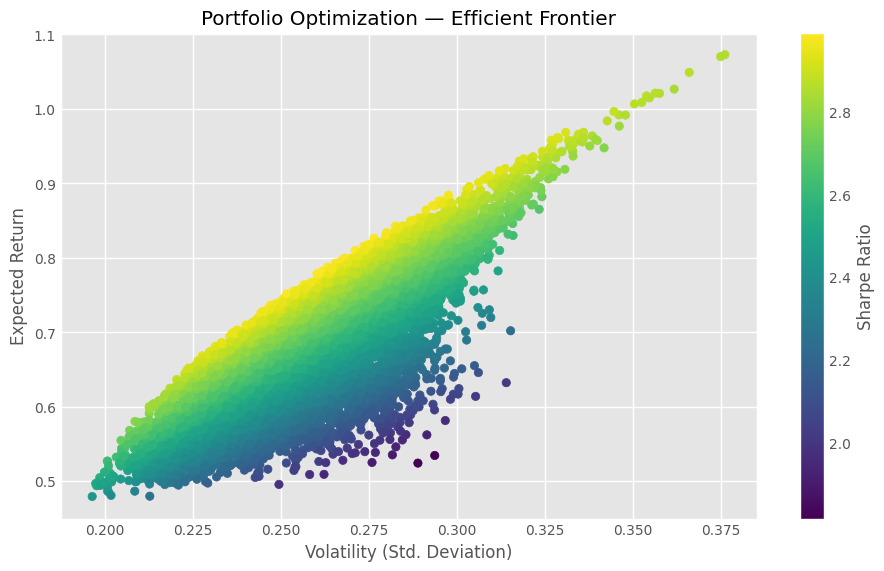

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Return')
plt.title('Portfolio Optimization — Efficient Frontier')
plt.grid(True)
plt.show()


* X-axis :  Represents portfolio volatility (risk).

* Y-axis:   Expected Return of the portfolio.

* Color gradient: Represents the Sharpe Ratio — from dark blue (lower Sharpe) to yellow (higher Sharpe).


**Explanation**

* Each dot represents a different portfolio configuration
* The upper edge of the curve forms the efficient frontier, these portfolios that offerthe highest expected returns for a given level of risk.

* Yellow dots near the top-right are ideal, they have higher returns and higher Sharpe Ratios, meaning better risk-adjusted performance.

* Portfolios below the frontier (e.g., blue dots) are inefficient,  they give lower returns for the same or higher risk.

________________________________________________________________________________

**Now we will find the portfolio with the maximum Sharpe Ratio from the 10,000 portfolios generated using Monte Carlo simulation.**



In [ ]:
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
optimal_weights = weights_record[max_sharpe_idx]

print("Optimal Weights (Max Sharpe):")
for i, stock in enumerate(['GOOG', 'AAPL', 'META', 'AMZN']):
    print(f"{stock}: {optimal_weights[i]:.2%}")


Optimal Weights (Max Sharpe):
GOOG: 0.22%
AAPL: 47.04%
META: 45.31%
AMZN: 7.42%


**Explanation**

* This is the most efficient portfolio (among the 10,000 generated),

* It offers the highest return per unit of risk (Sharpe Ratio),

* Shows how much to invest in each asset **(e.g., GOOG: 0.22%, AAPL: 47.04%, META: 45.31% and AMZN: 7.42%.).**
________________________________________________________________________________